In [8]:
import json

with open("../data/metrics.json", "r") as f:
    data = json.load(f)

In [18]:
import numpy as np
from pprint import pprint
pprint(np.array(data["crimson-sweep-4"]["update_norm"]).shape)

(3, 10, 4, 4)


In [27]:
import numpy as np
from collections import defaultdict
numpy_data = defaultdict(dict)

for k, v in data.items():
    for kk, vv in v.items():
        numpy_data[k][kk] = np.array(vv)


array({'actor_loss': [[[[2.7939677238464355e-08, -0.000510607729665935, -0.0009277835488319397, -0.0015368643216788769], [-0.0026393085718154907, -0.0025107262190431356, -0.004425997845828533, -0.005196641199290752], [-0.006337647791951895, -0.008306429721415043, -0.005316757597029209, -0.008403893560171127], [-0.008760555647313595, -0.007431820034980774, -0.005203282460570335, -0.007421799469739199]], [[-1.0710209608078003e-08, 0.00017693638801574707, 9.965570643544197e-05, 6.819702684879303e-05], [-0.0006277533248066902, -0.0008802214870229363, -0.001450247596949339, -0.0014794523594900966], [-0.002794003812596202, -0.0032776924781501293, -0.005094396416097879, -0.005870528053492308], [-0.005510123446583748, -0.005073415581136942, -0.006056174170225859, -0.005018625408411026]], [[-1.3969838619232178e-09, -0.00033594854176044464, -0.0006102295592427254, -0.0017804144881665707], [-0.0035201539285480976, -0.004444128833711147, -0.006020138040184975, -0.004731898661702871], [-0.004503113

In [28]:
# fetch the runs from the sweeps
# get the config to find out how long it was run for
# get the run name and use it to index into the data
from wandb import Api

api = Api(timeout=120)

metrics_data = defaultdict(list)

runs = api.sweep(f"oxwhirl/craftax-ppo-tuning/cmwbqphs").runs

for run in runs:
    num_train_interactions = run.config["num_train_interactions"]
    name = run.name
    d = numpy_data.get(name)
    if d:
        metrics_data[num_train_interactions].append(d)


In [29]:
# plot stuff

# get gradient norm dict
grad_norm = defaultdict(list)
update_norm = defaultdict(list)

for t_i, vs in metrics_data.items():
    for v in vs:
        gn = np.reshape(v["grad_norm"], (3, -1))
        un = np.reshape(v["update_norm"], (3, -1))
        grad_norm[t_i].append(gn)
        update_norm[t_i].append(un)
 

AttributeError: 'function' object has no attribute 'set_text'

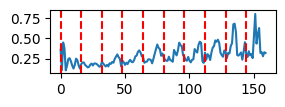

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure()

for i, num_train_interactions in enumerate(grad_norm):
    ax = plt.subplot(len(grad_norm), 2, 2 * i + 1)
    gn = grad_norm[num_train_interactions][0]
    gn_mean = np.mean(gn, axis=0)
    gn_std = np.std(gn, axis=0) / np.sqrt(gn_mean.shape[0])
    plt.plot(range(gn_mean.shape[0]), gn_mean)
    plt.fill_between(range(gn_mean.shape[0]), gn_mean - gn_std, gn_mean + gn_std, alpha=0.2)
    for k in range(0, un_mean.shape[0], 16):
        plt.axvline(x=k, color='r', linestyle='--')
    if i == 0:
        ax.title.set_text("Grad Norm")

    ax = plt.subplot(len(grad_norm), 2, 2 * i + 2)
    un = update_norm[num_train_interactions][0]
    un_mean = np.mean(un, axis=0)
    un_std = np.std(un, axis=0) / np.sqrt(un_mean.shape[0])
    plt.plot(range(un_mean.shape[0]), un_mean)
    plt.plot(range(un_mean.shape[0]), un_mean - un_std, un_mean + un_std)
    for k in range(0, un_mean.shape[0], 16):
        plt.axvline(x=k, color='r', linestyle='--')
    if i == 0:
        ax.title.set_text("Update Norm")
plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [11]:
import wandb
from tqdm import tqdm
from collections import defaultdict

api = wandb.Api(timeout=120)

runs = api.sweep("oxwhirl/craftax-ppo-analysis/ercsxibg").runs

metrics = [
    "m_cosine_similarity",
    "update_norm",
    "max_update",
    "max_grad",
    "grad_std",
    "v_cosine_similarity",
    "update_std",
    "grad_norm",
]


data = defaultdict(list)
for run in tqdm(runs, desc=" runs", position=0):
    if run.name != "celestial-sweep-8":
        continue
    records = run.scan_history(keys=metrics)
    metric_records = []
    for metric in tqdm(metrics, desc=" metrics", position=1, leave=False):
        data[metric].append([record[metric] for record in records])

 runs: 100%|██████████| 8/8 [02:59<00:00, 22.41s/it] 


In [1]:
import pickle

with open("ppo_update_data.pickle", "rb") as f:
    data = pickle.load(f)

In [2]:
ppo_data = data

In [3]:
import pickle

with open("count_reset_data.pkl", "rb") as f:
    data = pickle.load(f)

In [4]:
count_reset_data = data

In [5]:
import pickle
with open("clipped_ppo_data.pkl", "rb") as f:
    data = pickle.load(f)

In [6]:
clipped_ppo_data = data

In [7]:
data.keys()

dict_keys(['m_cosine_similarity', 'update_norm', 'max_update', 'max_grad', 'grad_std', 'v_cosine_similarity', 'update_std', 'grad_norm'])

In [12]:
un = np.array(data["update_norm"])

un[un.shape[0] // 8: un.shape[0] // 8 + 10]

array([[0.07005315, 0.04242117, 0.05536624, ..., 0.05772472, 0.05660815,
        0.05517846]])

In [9]:
import numpy as np
np.array(data["update_norm"])

array([], dtype=float64)

In [13]:
data

defaultdict(list,
            {'m_cosine_similarity': [[0.04993271827697754,
               -0.7218149900436401,
               0.686213493347168,
               0.7854216694831848,
               -0.2801782488822937,
               -0.09730539470911026,
               0.3222637176513672,
               0.7224605679512024,
               0.8581231236457825,
               -0.14782960712909698,
               -0.8051168322563171,
               -0.6706424951553345,
               -0.4042586088180542,
               0.06548047810792923,
               0.32778415083885193,
               -0.6710807085037231,
               -0.3933400809764862,
               0.3940650224685669,
               0.7885438799858093,
               0.9064096808433533,
               0.8115142583847046,
               0.7724348902702332,
               0.6189829707145691,
               0.6017840504646301,
               0.07090164721012115,
               -0.605586051940918,
               -0.5467503070831299,

In [14]:
unclipped_ppo_data = {k: np.array(v) for k,v in data.items()}

In [16]:
unclipped_ppo_data["update_norm"].shape

(1, 79999)

In [8]:
import numpy as np
ppo_np_data = {k: np.array(v) for k, v in ppo_data.items()}
count_reset_np_data = {k: np.array(v) for k, v in count_reset_data.items()}
clipped_ppo_np_data = {k: np.array(v) for k, v in clipped_ppo_data.items()}

In [9]:
ppo_reshaped_np_data = {k: v.reshape((8, -1)) for k, v in ppo_np_data.items()}
count_reset_reshaped_np_data = {k: v.reshape((8, -1)) for k, v in count_reset_np_data.items()}
clipped_ppo_reshaped_np_data = {k: v.reshape((8, -1)) for k, v in clipped_ppo_np_data.items()}

In [6]:
reshaped_np_data

{'grad_norm': array([[-0.57992065,  0.93090451, -0.89693117, ...,  0.38421872,
          0.33111289,  0.30172583],
        [-0.64592445,  0.94492936, -0.90535605, ...,  0.41244295,
          0.31101468,  0.43826815],
        [-0.51893198,  0.88766712, -0.88471878, ...,  0.30833149,
          0.31738043,  0.3784838 ],
        ...,
        [-0.59161216,  0.91442925, -0.8471545 , ...,  0.53119546,
          0.46245602,  0.40578327],
        [-0.64363742,  0.93810785, -0.90168697, ...,  0.44558996,
          0.30608276,  0.40850332],
        [-0.67783016,  0.94661552, -0.9152211 , ...,  0.35353768,
          0.3204141 ,  0.32784557]]),
 'update_norm': array([], shape=(8, 0), dtype=float64)}

In [13]:
reshaped_np_data.keys()

dict_keys(['m_cosine_similarity', 'update_norm', 'max_update', 'max_grad', 'grad_std', 'v_cosine_similarity', 'update_std', 'grad_norm'])

In [10]:
metrics = list(np_data.keys())

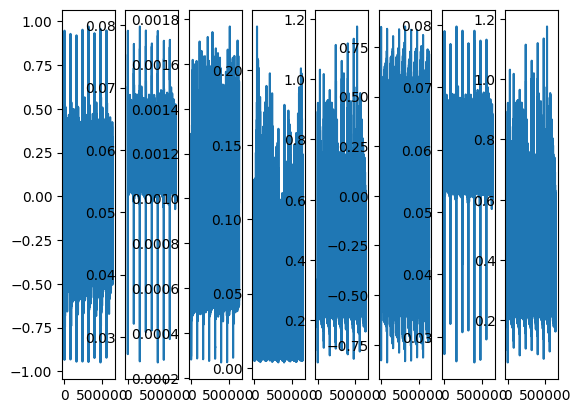

In [12]:
import matplotlib.pyplot as plt



for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i+1)
    plt.plot(list(range(np_data[metric].shape[0])), np_data[metric])

In [104]:
print({metric: reshaped_np_data[metric][:, 0] for metric in metrics})

{'m_cosine_similarity': array([ 0.04993288, -0.88177389,  0.02223001, -0.44434521, -0.71004152,
        0.23937701, -0.28714851, -0.79300827]), 'update_norm': array([0.07005315, 0.04089939, 0.06952766, 0.06145868, 0.04961121,
       0.0734791 , 0.06598593, 0.05422478]), 'max_update': array([0.00030017, 0.00030016, 0.00030009, 0.00029997, 0.00030024,
       0.00029995, 0.00030015, 0.00030019]), 'max_grad': array([0.00714805, 0.06474133, 0.0102409 , 0.01515679, 0.03663144,
       0.00517532, 0.00886187, 0.03508373]), 'grad_std': array([0.10240747, 0.37075451, 0.11182731, 0.11809053, 0.21645592,
       0.08741736, 0.10214601, 0.22020541]), 'v_cosine_similarity': array([ 0.02095994,  0.49655706,  0.01964368,  0.2979067 ,  0.39574105,
       -0.13465032,  0.21296014,  0.48627153]), 'update_std': array([0.07002627, 0.04089209, 0.06952672, 0.06145334, 0.04960797,
       0.07347717, 0.06597752, 0.05421967]), 'grad_norm': array([0.10241242, 0.37082702, 0.11183097, 0.11812482, 0.21659718,
      

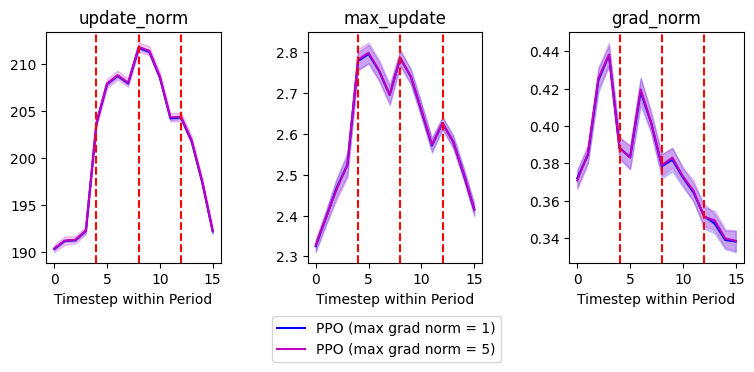

In [23]:
import matplotlib.pyplot as plt

num_seeds = 8

def plot_aggregated_mean_with_se(ax, data, period_length, metric, label, color="b"):
    """
    Plots the aggregated mean of each timestep in periods with shading representing the standard error.

    :param data: 1-D numpy array of data points.
    :param period_length: Length of each period to split the data into.
    """
    # Reshape the data to a 2D array where each row is a period
    # The last incomplete period is discarded
    num_complete_periods = data.shape[1] // period_length
    data_reshaped = data[: num_complete_periods * period_length].reshape(
        num_seeds, num_complete_periods, period_length
    )

    # Calculate means and standard errors for each timestep across periods
    data_reshaped = np.mean(data_reshaped, axis=1)
    means = np.mean(data_reshaped, axis=0)
    standard_errors = np.std(data_reshaped, axis=0, ddof=1) / np.sqrt(
        data_reshaped.shape[0] 
    )

    # X-axis values
    x_values = np.arange(period_length)

    # Plotting
    ax.plot(x_values, means, color=color, label=label)
    ax.fill_between(
        x_values,
        means - 2 * standard_errors,
        means + 2 * standard_errors,
        alpha=0.2,
        color=color,
    )

    # plt.ylabel("Aggregated Value")
    # plt.title("Aggregated Mean and Standard Error Across Periods")
    # plt.legend()


metrics = [
    # "m_cosine_similarity",
    "update_norm",
    "max_update",
    #"max_grad",
    # "grad_std",
    # "v_cosine_similarity",
    # "update_std",
    "grad_norm",
]


period = 16
splits = 1

lr_dict = {"Count Resetting": 1e-3, "PPO (max grad norm = 1)": 3e-4, "PPO (max grad norm = 5)": 3e-4}

def plot_data(ax, reshaped_np_data, split, metric, method, color="b"):
    metric_data = reshaped_np_data[metric][:, 15:]
    metric_data = metric_data[
        :, : ((metric_data.shape[1] // (period * splits)) * (period * splits))
    ]
    if metric == "max_update" or metric == "update_norm":
        metric_data = metric_data  / lr_dict[method]
    # metric_data = np.mean(metric_data, axis=0)
    split_size = metric_data.shape[1] // splits
    plot_aggregated_mean_with_se(
        ax,
        metric_data[:, split_size * split: split_size * (split + 1)],
        period,
        metric,
        method,
        color=color
    )

plt.figure(figsize=(len(metrics) * 3, 3 * splits))
for split in range(splits):
    for j, metric in enumerate(metrics):
        ax = plt.subplot(splits, len(metrics), split * len(metrics) + j + 1)
        plot_data(ax, ppo_reshaped_np_data, split, metric, "PPO (max grad norm = 1)", color="b")
        # plot_data(ax, count_reset_reshaped_np_data, split, metric, "Count Resetting", color="g")
        plot_data(ax, clipped_ppo_reshaped_np_data, split, metric, "PPO (max grad norm = 5)", color="m")
        for x in range(4, 16, 4):
            plt.axvline(x, color='r', linestyle='--')
        if split == 0:
            ax.set_title(metric)
        if split == splits - 1:
            ax.set_xlabel("Timestep within Period")

plt.legend(bbox_to_anchor=(-0.35, -0.2))
plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.savefig("ppo_update_analysis.pdf", bbox_inches="tight")

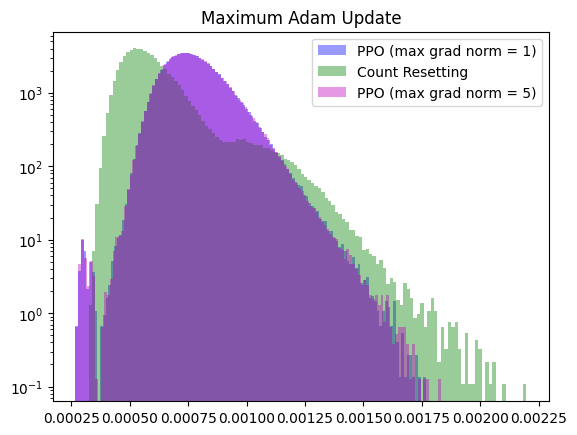

In [27]:
plt.hist(ppo_reshaped_np_data["max_update"][:, :].reshape(-1), bins=128, label="PPO (max grad norm = 1)", alpha=0.4, color="b", density=True, log=True)
plt.hist(count_reset_reshaped_np_data["max_update"][:, :].reshape(-1), bins=128, label="Count Resetting", alpha=0.4, color="g",density=True, log=True)
plt.hist(clipped_ppo_reshaped_np_data["max_update"][:, :].reshape(-1), bins=128, label="PPO (max grad norm = 5)", alpha=0.4, color="m", density=True, log=True)
plt.title("Maximum Adam Update")
plt.legend()
plt.savefig("maximum_update_log_histogram.pdf", bbox_inches="tight")

In [66]:
ppo_reshaped_np_data["update_norm"].shape

(8, 79999)

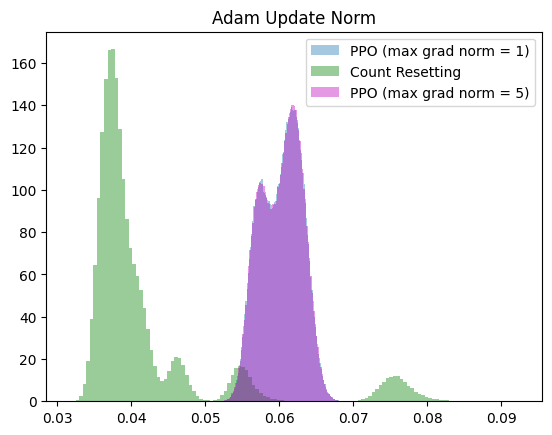

In [35]:
plt.hist(
    ppo_reshaped_np_data["update_norm"][:, 4000:].reshape(-1),
    bins=128,
    label="PPO (max grad norm = 1)",
    log=False,
    alpha=0.4,
    density=True,
)  # range=(0, 0.125))
plt.hist(
    count_reset_reshaped_np_data["update_norm"][:, 4000:].reshape(-1),
    bins=128,
    label="Count Resetting",
    # alpha=0.3,
    # range=(0, 0.125),
    log=False,
    alpha=0.4,
    color="g",
    density=True,
)
plt.hist(
    clipped_ppo_reshaped_np_data["update_norm"][:, 4000:].reshape(-1),
    bins=128,
    label="PPO (max grad norm = 5)",
    log=False,
    alpha=0.4,
    color="m",
    density=True,
)
plt.title("Adam Update Norm")
plt.legend()
plt.savefig("update_norm_histogram_less_first_5_percent.pdf", bbox_inches="tight")

In [126]:
reshaped_np_data["grad_norm"].shape

(8, 79999)

In [128]:
reshaped_np_data["grad_norm"].shape[1] % 16

15

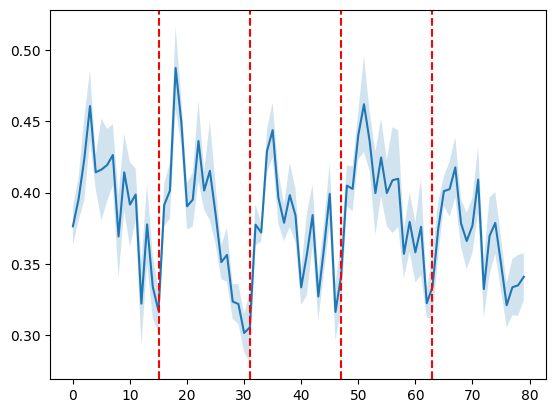

In [86]:
grad_norm = reshaped_np_data["grad_norm"][:, 2689 * 16:2694 * 16]

mean = np.mean(grad_norm, axis=0)
std = np.std(grad_norm, axis=0) / np.sqrt(grad_norm.shape[0])
plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2)
for x in range(16, 5 * 16, 16):
    plt.axvline(x=x-1, linestyle='--', color='r')

grad_norm = reshaped_np_data["gr"]

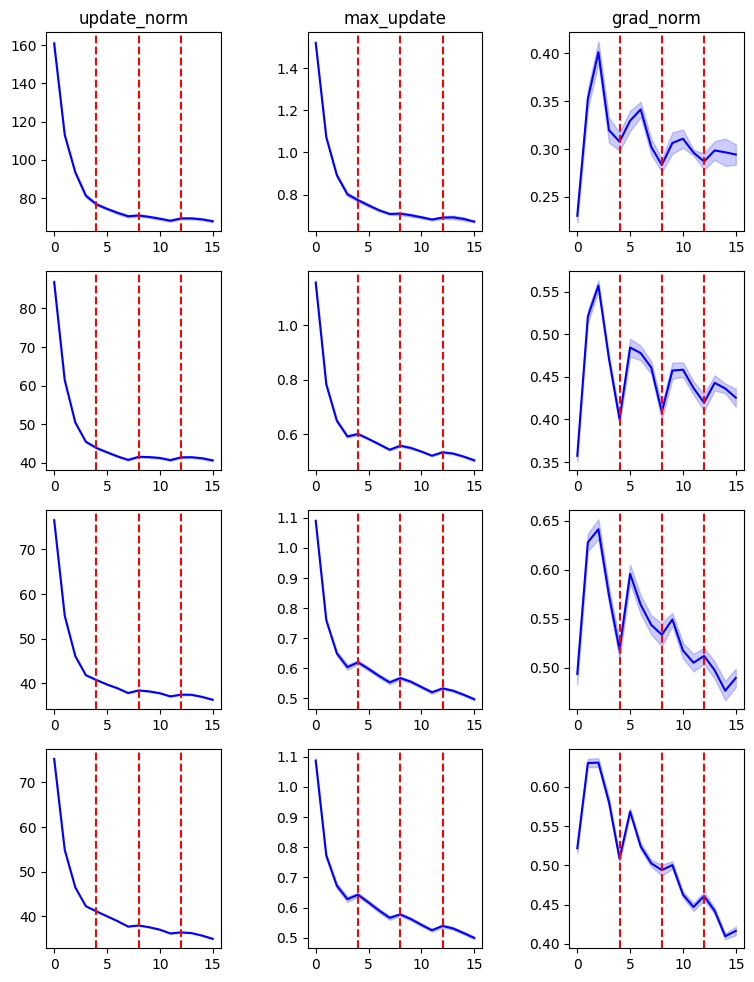

In [35]:
import matplotlib.pyplot as plt


def plot_aggregated_mean_with_se(ax, data, period_length, metric, color="b"):
    """
    Plots the aggregated mean of each timestep in periods with shading representing the standard error.

    :param data: 1-D numpy array of data points.
    :param period_length: Length of each period to split the data into.
    """
    # Reshape the data to a 2D array where each row is a period
    # The last incomplete period is discarded
    num_complete_periods = data.shape[1] // period_length
    data_reshaped = data[: num_complete_periods * period_length].reshape(
        8, num_complete_periods, period_length
    )

    # Calculate means and standard errors for each timestep across periods
    data_reshaped = np.mean(data_reshaped, axis=1)
    means = np.mean(data_reshaped, axis=0)
    standard_errors = np.std(data_reshaped, axis=0, ddof=1) / np.sqrt(
        data_reshaped.shape[0]
    )

    # X-axis values
    x_values = np.arange(period_length)

    # Plotting
    ax.plot(x_values, means, color="b", label="Mean")
    ax.fill_between(
        x_values,
        means - 2 * standard_errors,
        means + 2 * standard_errors,
        color="b",
        alpha=0.2,
        label="Standard Error",
    )

    # plt.ylabel("Aggregated Value")
    # plt.title("Aggregated Mean and Standard Error Across Periods")
    # plt.legend()


metrics = [
    # "m_cosine_similarity",
    "update_norm",
    "max_update",
    # "max_grad",
    # "grad_std",
    # "v_cosine_similarity",
    # "update_std",
    "grad_norm",
]

period = 16
def round_to_period(num, the_period=period):
    return int((num // the_period) * the_period)

splits = [0.0, 0.01, 0.1, 0.4, 1.0]
num_splits = len(splits)
plt.figure(figsize=(len(metrics) * 3, 3 * num_splits))
for i in range(num_splits - 1):
    split = splits[i]
    next_split = splits[i + 1]
    for j, metric in enumerate(metrics):
        metric_data = reshaped_np_data[metric][:, 15:]
        metric_data = metric_data[
            :, : ((metric_data.shape[1] // period) * period)
        ]
        if metric == "max_update" or metric == "update_norm":
            metric_data = metric_data / 1e-3
        # metric_data = np.mean(metric_data, axis=0)
        ax = plt.subplot(num_splits, len(metrics), i * len(metrics) + j + 1)
        split_data = metric_data[:, round_to_period(split * metric_data.shape[1]): round_to_period(next_split * metric_data.shape[1])]
        plot_aggregated_mean_with_se(
            ax,
            split_data,
            period,
            metric,
        )
        for x in range(4, 16, 4):
            plt.axvline(x, color="r", linestyle="--")
        if i == 0:
            ax.set_title(metric)
        if i == num_splits - 1:
            ax.set_xlabel("Timestep within Period")

plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.savefig("ppo_update_analysis.pdf", bbox_inches="tight")